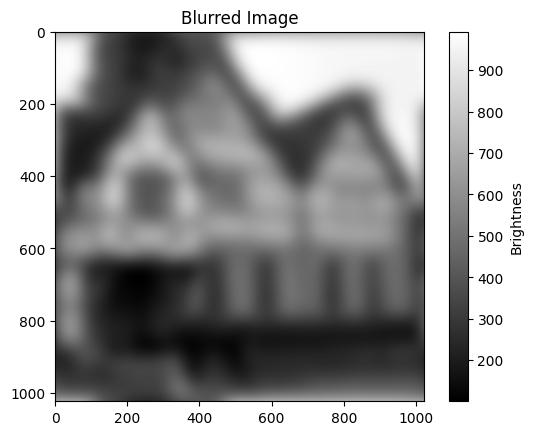

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the blurred image data
blur = np.loadtxt('Files/blur.txt')

plt.imshow(blur, cmap="gray", origin="upper")
plt.title("Blurred Image")
plt.colorbar(label="Brightness")
plt.show()

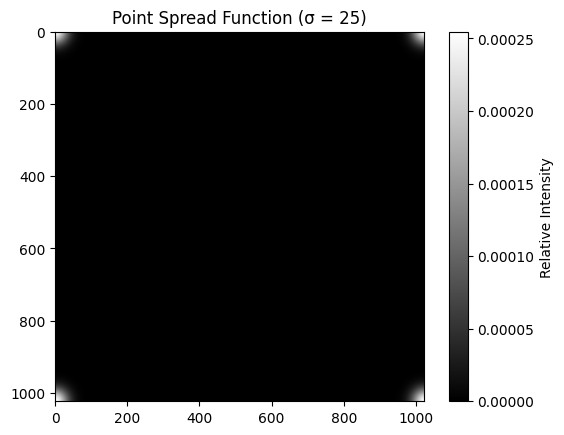

In [2]:
# (b) Define Gaussian PSF (point spread function)
sigma = 25
Ny, Nx = blur.shape

y = np.arange(-Ny//2, Ny/2)
x = np.arange(-Nx//2, Nx/2)
X, Y = np.meshgrid(x, y)

# Gaussian function
psf = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
psf /= psf.sum()  # normalize

plt.imshow(np.fft.ifftshift(psf), cmap="gray")
plt.title("Point Spread Function (σ = 25)")
plt.colorbar(label="Relative Intensity")
plt.show()


In [ ]:
# (c) Fourier transforms
fft_blur = np.fft.rfft2(blur)
fft_psf = np.fft.rfft2(psf)

eps = 1e-3
fft_psf_safe = np.where(np.abs(fft_psf) < eps, eps, fft_psf)

# Deconvolution (Fourier division)
fft_unblur = fft_blur / fft_psf_safe
# Inverse transform to get the unblurred image
unblur = np.fft.irfft2(fft_unblur)

# Normalize
unblur = np.clip(unblur, 0, np.max(unblur))



In [4]:
# (c) Fourier transforms
psf_pad = np.zeros_like(blur)
kh, kw = psf.shape
psf_pad[:kh, :kw] = psf              
psf_pad = np.fft.ifftshift(psf_pad)

fft_blur = np.fft.rfft2(blur)
fft_psf  = np.fft.rfft2(psf_pad)

eps = 1e-3
fft_psf_safe = np.where(np.abs(fft_psf) < eps, eps, fft_psf)

fft_unblur = fft_blur / fft_psf_safe

unblur = np.fft.irfft2(fft_unblur)
unblur = np.clip(unblur, 0, np.max(unblur))


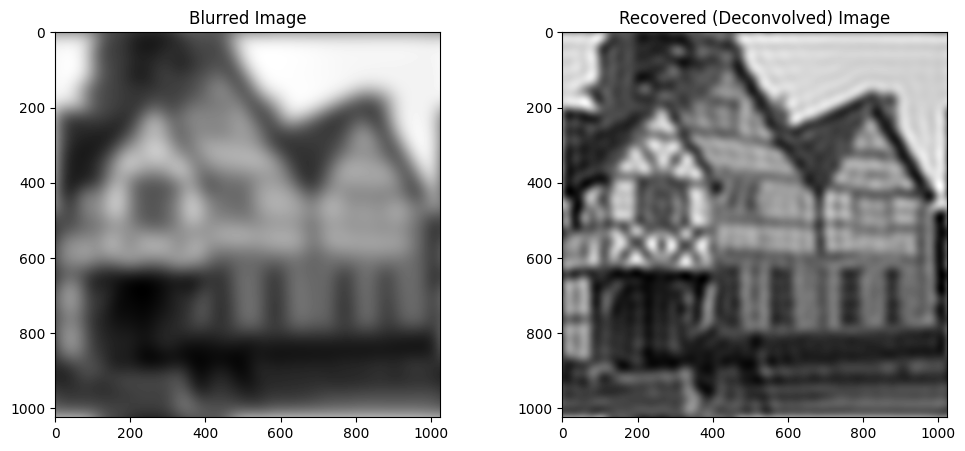

In [5]:
# plot (c)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(blur, cmap="gray", origin="upper")
axs[0].set_title("Blurred Image")

axs[1].imshow(unblur, cmap="gray", origin="upper")
axs[1].set_title("Recovered (Deconvolved) Image")

plt.show()
